# Дискретные модели

**Фазовым пространством** динамической системы является пространство, в котором каждому соостоянию системы соответствует некоторая точка этого пространтсва. Число переменных, необходимых для однозначного описания состояния системы называется **степенью свободы** (*degrees of freedom*) системы.

Дискретные модели динамических систем часто называются **разностныим уравнениями** (*difference equations*):
$$
x_t = F(x_{t-1}, t)
$$
В общем случае $x$ является вектором состояния, а $F$ может зависеть помимо последнего состояния $x_{t-1}$ также и от предыдущих состояний $x_{t-2}, \space x_{t-3} \ldots$

Из разностного уравнения можно получить серию значений состояний во времени, начиная с некоторого начального состояния $x_0$:
$$
\{x_0, x_1, x_2, x_3, \ldots\}
$$
Такие последовательности называются **временными рядами** (*time series*).

Разностные уравнения, в которые входят только линейные комбинации векторов состояний называются **линейниыми системами**.

**Системы первого порядка** (*first-order system*) описывается разностным уравнением, в которое входит только последнее состояние системы $x_{t-1}$. Все другие - **системы высших порядков** (*higher-order system*).

Для **автономных систем** переменная времени $t$ не входит явно в разностное уравнение.

Неавтономные разностные уравнения высших порядков всегда могут быть преобразованы в автономные уравнения первого порядка, путем введения дополнительных переменных состояния.

Линейные уравнения всегда имеют аналитическое решение, чего не скажешь о нелинейных.

## Модель с двумя переменными
Рассмотрим два разностных уравнения (difference equations):
$$
x_t = 0.5x_{t-1} + y_{t-1}
$$

$$
y_t = -0.5x_{t-1} + y_{t-1}
$$
с начальными условиями $x_0=1, \space y_0=1$.

Произведем симуляцию первых 30 шагов.

In [414]:
import matplotlib.pyplot as plt

def observe(x, y, history):
    history[0].append(x)
    history[1].append(y)

def update(x, y):
    x_next = 0.45 * x + y
    y_next = -0.45 * x + y
    return x_next, y_next

In [415]:
%matplotlib qt
x = y = 1.
result = [[x], [y]]

fig, ax = plt.subplots()

for t in range(30):
    ax.clear()
    x, y = update(x, y)
    observe(x, y, result)
    ax.imshow([[x, y]], vmin=-10., vmax=10., cmap='ocean')
    plt.pause(0.1)

Динамика изменения переменных:

Text(0.5, 0, 't')

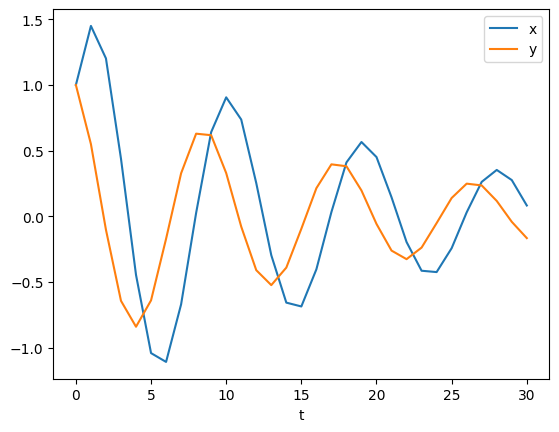

In [416]:
%matplotlib inline
plt.plot(result[0], label="x")
plt.plot(result[1], label="y")
plt.legend()
plt.xlabel("t")

Фазовое пространство:

Text(0, 0.5, 'y')

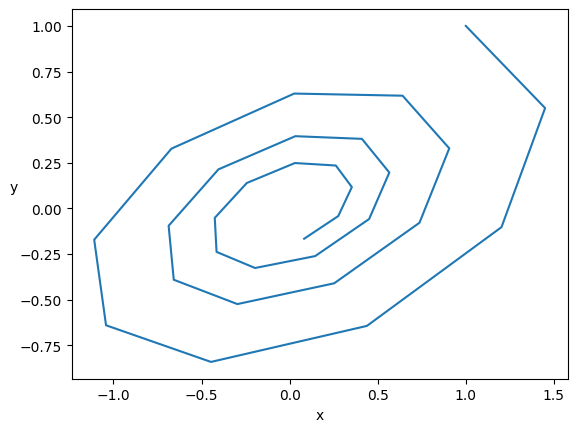

In [417]:
%matplotlib inline
plt.plot(result[0], result[1])
plt.xlabel("x")
plt.ylabel("y", rotation=0)

## Logistic Growth
Модификация экспоненциального раста $x_t = a x_{t-1}$, в которой имеется верхняя граница роста популяции $K$. По мере приближения численности к верхней границе, скорость роста убывает до 0:
$$
x_t = x_{t-1} + ax_{t-1} \left( 1 - \frac{x_{t-1}}{K} \right)
$$

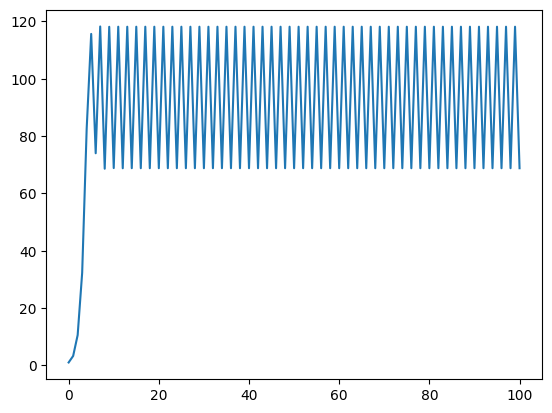

In [590]:
# def update(x, r=1.1):
#     return a*x

def update(x, a=2.3, k=100):
    return x + a*x*(1 - x/k)

x = 1   # 200
history = [x]

for i in range(100):
    x = update(x)
    history.append(x)

%matplotlib inline
plt.plot(history)

Кривая $x_t = f(x_{t-1})$ и диагональная линия $x_t = x_{t-1}$.

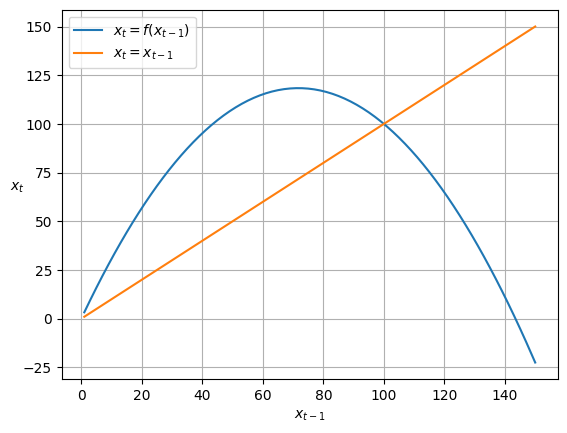

In [557]:
x_values = [x for x in range(1, 151)]
x_next_values = [update(x) for x in x_values]

plt.plot(x_values, x_next_values,
         label="$x_t = f(x_{t-1})$")
plt.plot([1, 150], [1, 150], label="$x_t = x_{t-1}$")
plt.xlabel("$x_{t-1}$")
plt.ylabel("$x_{t}$", rotation=0)
plt.legend()
plt.grid()

Изменим модель так, чтобы скорость роста была максимальной при некотором оптимальном размере популяции, и убывала при отдалении от этого значения. В простейшем случае это будет линейный рост до оптимального значения и далее линейное убывание. Также можно рассмотреть квадратичное убывание скорости роста.

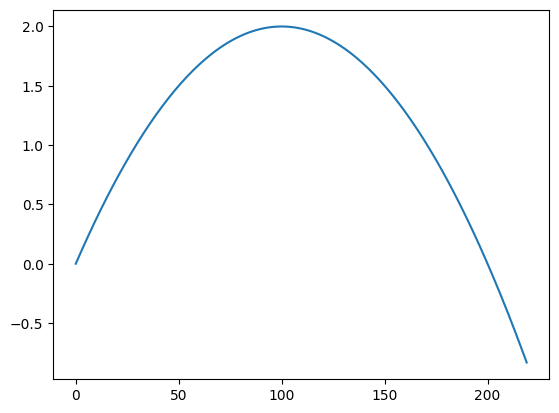

In [558]:
array = []
a = 2.
k = 100
for x in range(220):
    # factor = a*(1 - abs(1 - x/k))     # линейное убывание 
    factor = a*(1 - (1 - x/k)**2)       # квадратичное убывание
    array.append(factor)

plt.plot(array)

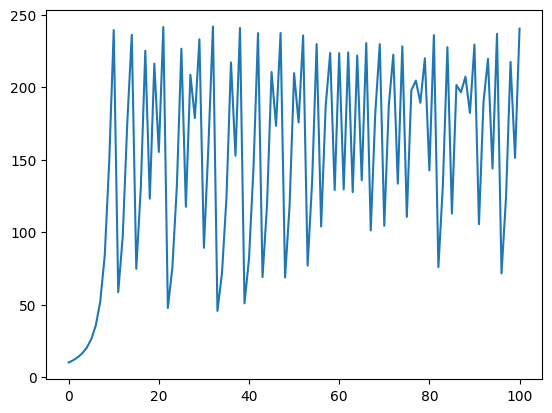

In [559]:
def update(x, a=0.8, k=100):
    # return x + a*x * (1 - abs(1 - x/k))
    return x + a*x * (1 - (1 - x/k)**2)

x = 10
history = [x]

for i in range(100):
    x = update(x)
    history.append(x)

%matplotlib inline
plt.plot(history)

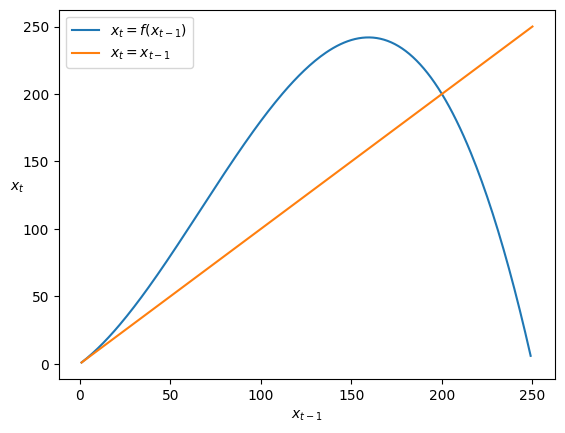

In [560]:
iterations = 250

x_values = [x for x in range(1, iterations)]
x_next_values = [update(x) for x in x_values]

plt.plot(x_values, x_next_values,
         label="$x_t = f(x_{t-1})$")
plt.plot([1, iterations], [1, iterations], label="$x_t = x_{t-1}$")
plt.xlabel("$x_{t-1}$")
plt.ylabel("$x_{t}$", rotation=0)
plt.legend()

# Анализ моделей с дискретным временем

## Нахождения точек равновесия
При анализе автономных динамических систем первого порядка с дискретным временем $x_t = F(x_{t-1})$ в первую очередь следует найти **точки равновесия** (*equilibrium points*), выяснить, являются ли они устойчивыми или нет. 

Можно решить уравнение $x_{eq} = F(x_{eq})$ и получить все точки равновесия. Для Logistic Grow мы плучили бы две точки равновесия $0$ и $K$, что вполне ожидаемо.

## Визуализация фазового пространства
Если системя является двумерной или трехмерной, то имеет смысл визуализировать динамику системы в фазовом пространтсве. При этом может потребоваться запустить много симуляций при различных начальных состояниях. Однако следует иметь в виду, что при отрисовке множества траекторий в трехмерном фазовом пространстве результат может стать очень запутанным из-за избытка линий. Отрисовка малого числа характеристических траекторй более полезно. Также следует иметь в виду, что в общем случае визуализация фазового пространства не всегда дает картинку, которая проста для восприятия.

## Cobweb Plots (Verhulst diagram)

Построим кривую $x_t = f(x_{t-1})$ и диагональная линию $x_t = x_{t-1}$ для для Logistic Growth с $a = 1.5, K = 1$:
$$
N_t = N_{t-1} + a N_{t-1} (1 - \frac{N_{t-1}}{K})
$$

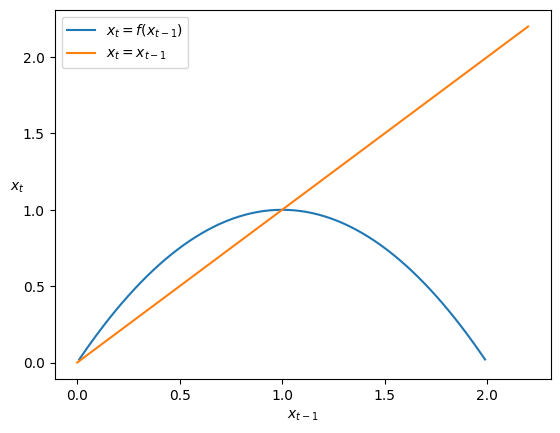

In [584]:
def update(n, a=1., k=1.):
    return n + a*n * (1 - n/k)

iterations = 100

n_values = [n/iterations for n in range(1, 200)]
n_next_values = [update(n) for n in n_values]

plt.plot(n_values, n_next_values,
         label="$x_t = f(x_{t-1})$")
plt.plot([0, 2.2], [0, 2.2], label="$x_t = x_{t-1}$")
plt.xlabel("$x_{t-1}$")
plt.ylabel("$x_{t}$", rotation=0)
plt.legend()

Такой трюк работает только для одномерного случая, так как для построения такой траектории в метафазовом пространстве требуется по две оси для каждого измерения. По этим графикам можно простроить **cobweb plot**, начиная с некоторого начального значения $x$, которая будет показывать траекторию изменения состояния системы. Запустим симуляцию при $N=0.2$

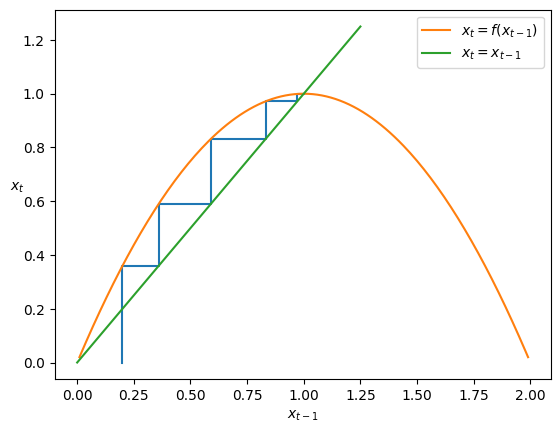

In [580]:
N = 0.2
history = [N]

for i in range(100):
    N = update(N)
    history.append(N)

horizontal, vertical = [history[0]], [0]

for n in history:
# for n in history[-10:]:
    horizontal.append(horizontal[-1])
    horizontal.append(n)
    vertical.append(n)
    vertical.append(n)

plt.plot(horizontal, vertical)

plt.plot(n_values, n_next_values,
         label="$x_t = f(x_{t-1})$")
plt.plot([0, 1.25], [0, 1.25], label="$x_t = x_{t-1}$")
plt.xlabel("$x_{t-1}$")
plt.ylabel("$x_{t}$", rotation=0)
plt.legend()

При $a=1.5$ видно, что сисмема приходит к равновесной точке $x=1$. Если же запустить симуляцию при $a=2.5$ то система предейдет к стационарной ситуации, когда состояние колеблется между 0.6 и 1.2. При $a=3$ система и вовсе не приходит к стационарному поведению.

## Масштабирование переменных (Variable Rescaling)

### Logistic map
Часто полезно произвести масштабирование переменных для устранения параметров из модели без потери общности. Произведем масштабирование меременной в модели Logistic Growth:
$$
x_t = x_{t-1} + ax_{t-1} \left( 1 - \frac{x_{t-1}}{K} \right)
$$
В данной модели имеется всего одна переменная $x$. Первым делом произведем замену $x \to \alpha x'$:
$$
\alpha x'_t = \alpha x'_{t-1} + a\alpha x'_{t-1} \left( 1 - \frac{\alpha x'_{t-1}}{K} \right)
$$
Произведя некоторые преобразования и замены $\alpha = K(1+a)/a$ и 
$$
r = 1 + a
$$
получем упрощенную форму исходного уравнения (подробнее Sayama 80), которая представляет собой модель **Logistic Map**:
$$
x'_t = r x'_{t-1} (1 - x'_{t-1})
$$
В результате вместо двух параметров ($a, K$) мы имеем один параметр $r$ в итоговом уравнении, что упрощает исследование модели. Динамика масштабированной модели полностью совпадает с исходной моделью, разница лишь в единицах измерения.

Следует заметить, что $x'$ представляет собой не долю от максимального значения ($x/K$), а выражется как:
$$
x' = \frac{x}{\alpha} = \frac{ax}{K(1+a)}
$$
при $a=1$ получим $x' = 0.5 x / K$. Тогда $x'=1$ соответствует значению $x \approx 2 K$.

0.8237481449275738

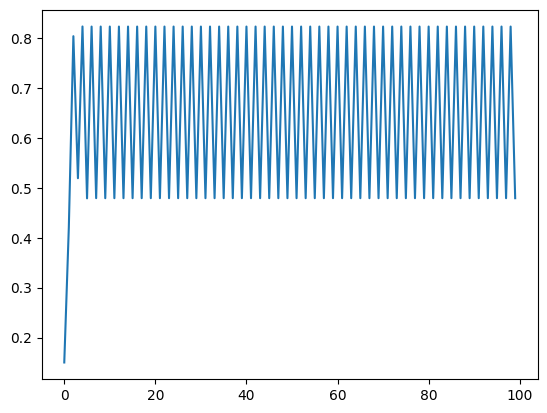

In [594]:
def update(x, r=3.3):
    return r*x * (1 - x)

x = 0.15
history = [x]

for i in range(1000):
    x = update(x)
    history.append(x)

%matplotlib inline
# plt.plot(history[-100:])
plt.plot(history[:100])
max(history)

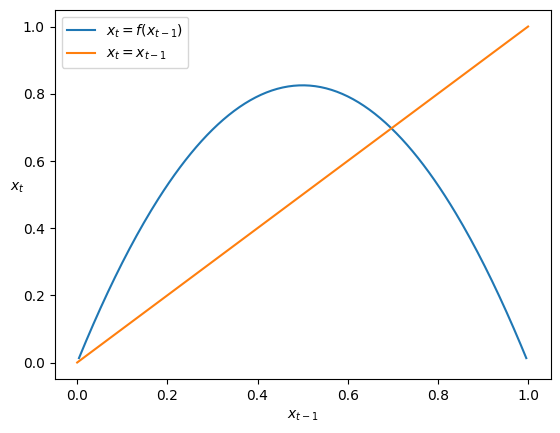

In [595]:
iterations = 250

x_values = [x/iterations for x in range(1, iterations)]
x_next_values = [update(x) for x in x_values]

plt.plot(x_values, x_next_values,
         label="$x_t = f(x_{t-1})$")
plt.plot([0, 1], [0, 1], label="$x_t = x_{t-1}$")
plt.xlabel("$x_{t-1}$")
plt.ylabel("$x_{t}$", rotation=0)
plt.legend()

## Асимптотическое поведение дискретных линейных динамических систем
Асимптотическое поведение системы показывает, к чему придет система, если устремить время к бесконечности. Для линейных систем это полностью предсказуемо. В рамках моделей с дискретным временем линейными динемическими системами называются такие системы, чья динамика омжет быть описана как 
$$
\mathbf x_t = A \mathbf x_{t-1}
$$
где $\mathbf x_t$ - вектор состояния системы, $A$ - матрица коэффициентов. В общем случае в уравнении может присутствовать еще постоянный вектор: $\mathbf x_t = A \mathbf x_{t-1} + \mathbf b$, но мы всегда можем избавиться от него перейдя к однородным координатам.

Очевидно, что решение уравнения может быть выражено в замкнутой форме ($ \mathbf x_{0}$ — начальное состояние системы):
$$
\mathbf x_t = A^t \mathbf x_{0}
$$
Как система будет вести себя при $t \to \infty$ ? Экспоненциальная функция от матрицы не очень проста в вичислении, поэтому необходимо проебразовать ее в более удобную форму, и здесь пригодятся собственные значения и вектора матрицы $A$:
$$
A \mathbf v_i = \lambda_i \mathbf v_i
$$
Для собственных векторов применение $t$ раз оператора $A$ к собственному вектору $v_i$ выражается довольно просто:
$$
A^t \mathbf v_i = \lambda_i^t \mathbf v_i 
$$
Если бы мы могли выразить $\mathbf x_0$ через собственные векторы, то в решении уравнения мы также могли бы заменить экспоненциальную функцию от матрицы на экспоненты от скаляров. Как правило, матрицы $n \times n$, которые используются в таких случаях являются диагонализируемыми, поэтому имеют $n$ линейно независимых собственных векторов, поэтому из них можно составить базис. Так что $\mathbf x_0$ можно выразить через собственные векторы:
$$
\mathbf x_0 = b_1 \mathbf v_1 + b_2 \mathbf v_2 + \ldots + b_n \mathbf v_n
$$

Теперь решение уравнения, выраженное через собственные векторы будет выглядеть так:
$$
\mathbf x_t = b_1 \mathbf \lambda_1^t \mathbf v_1 + b_2 \mathbf \lambda_2^t \mathbf v_2 + \ldots + b_n \mathbf \lambda_n^t \mathbf v_n
$$
Собственные значения в общем случае могут быть как положительнми так и отрицательными, больше 1 или меньше. И при $t \to \infty$ доминировать будет то слагаемое, в котором $\lambda$ максимально по своей абсолютной величине (**доминирующее собственное значение**). Так, если доминирует $\lambda_1$, то $\mathbf v_1$ будет **доминирующим собственным ветором**:
$$
\mathbf x_t = \lambda_1^t \left( b_1 \mathbf v_1 + b_2 \left( \frac{\lambda_2}{\lambda_1} \right)^t \mathbf v_2 + \ldots + b_n \left( \frac{\lambda_n}{\lambda_1} \right)^t \mathbf v_n \right)
$$
$$
\lim_{t \to \infty} \mathbf x_t = \lambda_1^t b_1 \mathbf v_1
$$
Если матрица коэффициентов линейной динамической системы имеет один доминирующий собственный вектор, то состояние системы будет асимптотически стремиться в напралении этого вектора, назависимо от того, какими был было начальное состояние. Это свойство можно рассматривать как очень простая тривиальная линейная версия самоорганизации.

#### Пример: Числа Фибоначи
Рассмотрим асимптотическое поведение последовательности Фибоначи:
$$
x_t = x_{t-1} + x_{t-2}
$$
Это одномерная модель второго порядка. Превратим ее в двумерную модель первого порядка:
$$
x_t = x_{t-1} + y_{t-1} \\
y_t = x_{t-1}
$$
Обозначим $\mathbf r_t = (x_t, y_t)$. Тогда модель можно выразить так:
$$
\mathbf r_t = 
\begin{bmatrix}
    1 & 1 \\
    1 & 0
\end{bmatrix}
\mathbf r_{t-1}
$$
Можно было бы найти собственные значения и векторы вручную (как это представленно в Sayama 84), но мы воспользуемся функцией `eig`, которая возвращает кортеж из двух элементов: собственные значения и собственные вектора. Векторами являются колонки матрицы, и из индексы совпадают с соответствующими индексами собственных значений. Собственный вектор, для заданного собственного значения, выбырается такой, чтобы его длина была равна 1.

In [7]:
import numpy as np

A = np.array([[1., 1.],
              [1., 0.]])

eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[ 1.61803399 -0.61803399]
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


Как и следовало ожидать, матрица $2 \times 2$ обладает двумя собственными значениями. Первое значение $\lambda_1 = 1.618$ является максимальным и представлят собой золотое сечение, т.е. это в данном случае доминирующее собственное значение. Ему соответствует вектор $\mathbf v_1 = (0.851, 0.526)$. Второе собственное значение $\lambda_2 = -0.618$ и ему соответствует собственный вектор $\mathbf v_2 = (-0.526, 0.851)$. Начальное значение $\mathbf r_0$ может быть выражено через эти базисные векторы: $\mathbf r_0 = b_1 \mathbf v_1 + b_2 \mathbf v_2$. Тогда решение системы будет выражено в замкнутом виде
$$
\mathbf r_t = \lambda_1^t b_1 \mathbf v_1 + \lambda_2^t b_2 \mathbf v_2 
$$
При больших $t$ величина второго слагаемого будет пренебрежимо мало по сравнению с первым:
$$
\lim_{t \to \infty} \mathbf r_t = \lambda_1^t b_1 \mathbf v_1 = \lambda_1 (\lambda_1^{t-1} b_1 \mathbf v_1) = \lambda_1 \mathbf r_{t-1}
\\
(x_t, \space y_t) \approx 1.618 \space (x_{t-1}, \space y_{t-1})
$$
Таким образом асимптотическое поведение системы выглядит так:
$$
x_t \approx 1.618 \space x_{t-1}
$$
Доминирующее собственное значение показывает асимптотическое соотношение между длинами векторов состояния системы, соответствующих двум последовательным временным точкам: каждый последующий вектор будет в $\lambda_1$ раз длиннее предыдущего. Так как абсолютная величина доминирующего собственного значения больше 1, система расходится, т.е. *не стабильна*. Если бы она была меньше 1, то система сходилась бы бы к 0 и была бы *стабильной*. При равенстве 1 не было бы ни расхождения и схождения и система могла бы сходиться к ненулевой точке равновесия. Все эти рассуждения применимы и к не доминирующим собственным значениям. 

Динамика линейной системы может быть разложена на множество независимых одномерных компонентов, каждый из которых движется вдоль своего собственного вектора. Общая траектория может быть получена просто линейной супперпозицией динамики этих независимых компонентов.

Нарисуем динамику системы в фазовом пространстве для 81 пар начальных состояний системы, чтобы увидеть эту асимптотику. Начальное состояние в каждом случае находится около центра диаграммы, и в зависимости от значений система развивается либо в одну, либо в другую сторону. Зеленой стрелкой обозначен доминирующий собственный вектор, а красным - не доминирущий. 

В функции `get_history()` производится вычисление последующих состояний по задынному начальному вектору `r` и матрице `A`. Представленны две функции: 
- в первой функции следующие состояния будут высчитываться по формуле $\mathbf r_t = A \mathbf r_{t-1}$
- во второй функции для этого используется формула $\mathbf r_t = \lambda_1^t b_1 \mathbf v_1 + \lambda_2^t b_2 \mathbf v_2$

In [8]:
def get_history(r, A, iters):
    history = np.zeros((iters+1, len(r)))
    for i in range(iters+1):
        history[i] = r
        r = np.dot(A, r)
    return history
    
def get_history(r, A, iters):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    history = np.zeros((iters+1, len(r)))
    for i in range(iters+1):
        history[i] = r
        # представление r в базисе собственных векторов
        b = np.dot(eigenvectors.T, r)
        b *= eigenvalues
        # представление b в исходном базисе
        r = np.dot(np.linalg.inv(eigenvectors.T), b)
    return history

81


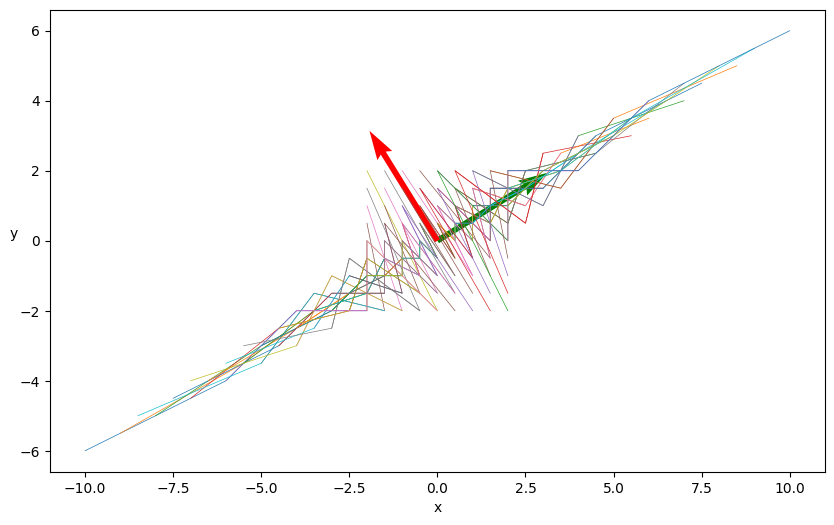

In [3]:
import matplotlib.pyplot as plt

iterations = 3  # 6, 9

history_list = []
xy_values = np.arange(-2., 2.5, 0.5)

for x in xy_values:
    for y in xy_values:
        r = np.array([x, y])    # начальные значения x_0 и y_0
        history_list.append(get_history(r, A, iterations))

plt.figure(figsize=(10, 6))
for history in history_list:
    plt.plot(history[:, 0], history[:, 1], linewidth=0.5)

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], color='g', scale=6)
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], color='r', scale=6)

print(len(history_list))

Два собственных вектора определяют направления двух **инвариантных линий** (*invriant lines*) в фазовом пространстве: при трансформации матрицей $A$ точки, лежащей на этих линиях матрицей, результат отобрзить на ту же линию. Видно, что вдоль зеленого вектора идет расхождение, так как $| \lambda_1 | > 1$, в то время как вдоль красного вектора динамика сходится к 0, так как  $| \lambda_2 | < 1$. Кроме того следует заметить, что вдоль красного вектора компонент системы скачет из стороны в сторону. Это связанно с тем, что $\lambda_2$ является отрицательным. И на каждом шаге $\lambda_2^t$ меняет свой знак и разворачивает направление вектора $\mathbf v_2$.

Некоторые собственные значения матрицы коэффициентов могут оказаться комплексно сопряженными. Это может случиться только в случае несимметричной матрицы. В таком случае собственные вектора также являются комплексными, и они не будут определять инваринтных линий в фазовом пространстве. В этом случае будет иметь место вращение. Линейные системы могут проявлять осциллирющее поведение, которое в фазовом пространстве представляется вращением. При этом абсолютная величина комплексного собственного значения по прежнему характеризует сходимость системы.

Рассмотрим систему, в которой происходит вращение:

In [4]:
A = np.array([[ 0.5, 1],
              [-0.5, 1]])

eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[0.75+0.66143783j 0.75-0.66143783j]
[[0.81649658+0.j         0.81649658-0.j        ]
 [0.20412415+0.54006172j 0.20412415-0.54006172j]]


Заметим, что по абсолютной величине эти мнимые собственные значения равны 1. Так что система будет проявлять устойчивую осцилляцию.

In [5]:
list(map(abs, eigenvalues))

[0.9999999999999999, 0.9999999999999999]

Text(0, 0.5, 'y')

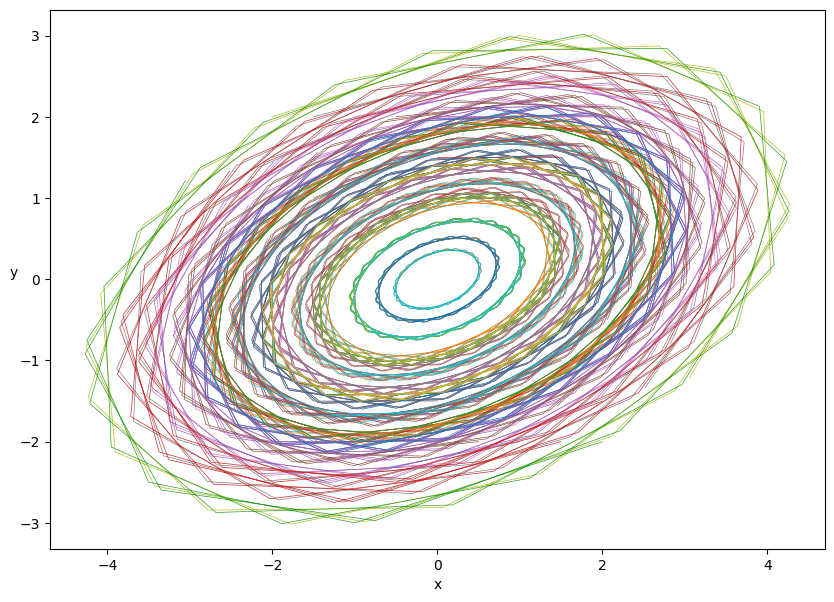

In [6]:
def get_history(r, A, iters):
    history = np.zeros((iters+1, len(r)))
    for i in range(iters+1):
        history[i] = r
        r = np.dot(A, r)
    return history

iterations = 30
history_list = []
xy_values = np.arange(-2., 2.5, 0.5)

for x in xy_values:
    for y in xy_values:
        r = np.array([x, y])    # начальные значения x_0 и y_0
        history_list.append(get_history(r, A, iterations))

plt.figure(figsize=(10, 7))
for history in history_list:
    plt.plot(history[:, 0], history[:, 1], linewidth=0.5)

plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Анализ линейной стабильности нелинейных систем
Приведенный выше анализ асимптотического поведения не применим для нелинейных систем, и общей методологии нет. Однако собственные значения и собственные векторы позволяют произвести анализ линейной стабильности нелинейных систем в окрестности точки равновесия путем линеаризации. Основная идея заключается в представлении динамики системы через малые возмущения, добавляемые к точке равновесия.

### Одномерный случай
Рассмотрим для начала одномерный случай. Пусть динамика выражается нелинейным разностным уравнением 
$$
x_t = F(x_{t-1})
$$
Выведем выражение для малого возмущения $\Delta x$, вносимого в систему, находящейся в точке равновесия $x_{eq}$:

<img src="images/stability.jpg">

В качестве примера проанализируем Logistic Growth:

<img src="images/stability_example.jpg">


### Многомерный случай
Рассмотрим систему, состояние которой характеризуется $n$ переменными $\mathbf x = (x_1, \ldots, x_n)$. Тогда динамика системы может быть выражена при помощи нелинейного отображения $\mathbf F$:
$$
\mathbf x_t = \mathbf F (\mathbf x_{t-1})
$$
Выведем выражение для малого возмущения $\Delta \mathbf x = (x_1+\Delta x_1, \ldots, x_n+\Delta x_n)$, вносимого в систему, находящейся в точке равновесия $\mathbf x_{eq}$:

<img src="images/stability_multivariate.jpg">

$$
\Delta \mathbf x_t \approx \mathbf J \Delta \mathbf x_{t-1}
$$
где $\mathbf J$ - якобиан (Jacobian matrix) отображения $\mathbf F$ в точке равновесия $\mathbf x_{eq}$. Результат получен в результате линеаризации исходной функции и потому является приближенным.

Вычислив собственные значения матрицы $\mathbf J$ можно увидеть, является система стабильной в точке $\mathbf x_{eq}$ или нет. Если абсолютная величина доминирующего собственного значения $\lambda_d$ меньше 1, то точку равновесия можно считать устойчивой. Если $|\lambda_d| > 1$ - точка равновесия не устойчива. Нестабильная точка может содержать в общем случае и другие собственные значения, которые по абсолютной величине меньше 1. Такие точки равновесия называются седловинами (*saddle points*), возле которых траектории могут притягиваться вдольно одного направления и отталкиваться вдоль другого. Если $|\lambda_d| = 1$, то это говорит о том, что система может быть **нейтральной** (*neutral*), что так же называется устойчиой по Ляпунову. Это означает, что состояние системы ни расходится ни схоодится к точке равновесия. В действительности, для доказательства того, что точка действительно является нейтральной, требуется более продвинутый нелинейный анализ. Также собственные значения могут быть комплексно сопряженными. В этом случаее имеет место осцилляция вокруг точки равновесия. Если эти комплексно сопряженные собственные значения являются доминирующими, то такие точки равновесия называются стабильным $|\lambda| < 1$ или не стабильным $|\lambda| > 1$ спиральными фокусом (spiral focus) или **нейтральным центром** (*neutral center*) если $|\lambda| = 1$.

<img src="images/equilibrium_points.png">